<a href="https://colab.research.google.com/github/zebengberg/wasatch/blob/master/colab/axelrod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wasatch Python Project: Iterated Prisoner's Dilemma

Instructions:

- To run a cell, press shift + enter
- Read through the existing code, and add your in where you see _TODO_.

In [1]:
# ipython jupyter-console 
!pip install -q -U PyYAML
!pip install -q axelrod
# you can ignore any errors

     |████████████████████████████████| 645kB 7.6MB/s 
     |████████████████████████████████| 194kB 7.7MB/s 
     |████████████████████████████████| 368kB 13.3MB/s 
     |████████████████████████████████| 102kB 6.6MB/s 
ERROR: jupyter-console 5.2.0 has requirement prompt-toolkit<2.0.0,>=1.0.0, but you'll have prompt-toolkit 3.0.16 which is incompatible.
ERROR: ipython 5.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.4, but you'll have prompt-toolkit 3.0.16 which is incompatible.


In [2]:
import axelrod

## Game Basics

See [here](https://axelrod.readthedocs.io/en/stable/reference/play_contexts.html).

In [3]:
for k, v in axelrod.game.DefaultGame.scores.items():
  print(k, v)

(C, C) (3, 3)
(D, D) (1, 1)
(C, D) (0, 5)
(D, C) (5, 0)


## Strategies

`axelrod` comes with a bunch of prebuilt strategies.

## one vs one

The `axelrod` package contains a `Match` class for one vs one games.

In [4]:
def print_scores(match):
  """Print player scores and winner after running match.play()."""
  for p, score in zip(match.players, match.final_score()):
    print(f'{p.name}: {score}')
  print('Winner: ', match.winner())


# playing a match of 10 games between Cooperator and Alternator
players = axelrod.Cooperator(), axelrod.Alternator()
match = axelrod.Match(players, 10)
result = match.play()
print(result)
print(match.sparklines())  # black = C, white = D
print_scores(match)

[(C, C), (C, D), (C, C), (C, D), (C, C), (C, D), (C, C), (C, D), (C, C), (C, D)]
██████████
█ █ █ █ █ 
Cooperator: 15
Alternator: 40
Winner:  Alternator


In [5]:
# playing a match of 100 games between Cooperator and Random
players = axelrod.Cooperator(), axelrod.Random()
match = axelrod.Match(players, 100)
match.play()
print(match.sparklines())
print_scores(match)

████████████████████████████████████████████████████████████████████████████████████████████████████
  █ ██ █  ██  ██  █  █  █ █    ██  █ ████  ██  █ █    ███ ████   ██  ████ █ ████████         ██ ████
Cooperator: 153
Random: 398
Winner:  Random: 0.5


## Tournament play

We can also have many players engage in a tournament.

Analysing: 100%|██████████| 25/25 [00:00<00:00, 129.96it/s]


['Defector', 'Grudger', 'Random: 0.5', 'Alternator', 'Cooperator']


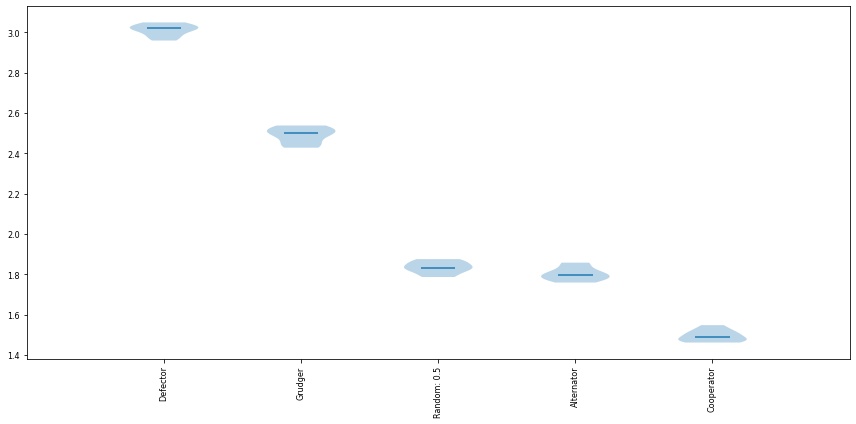

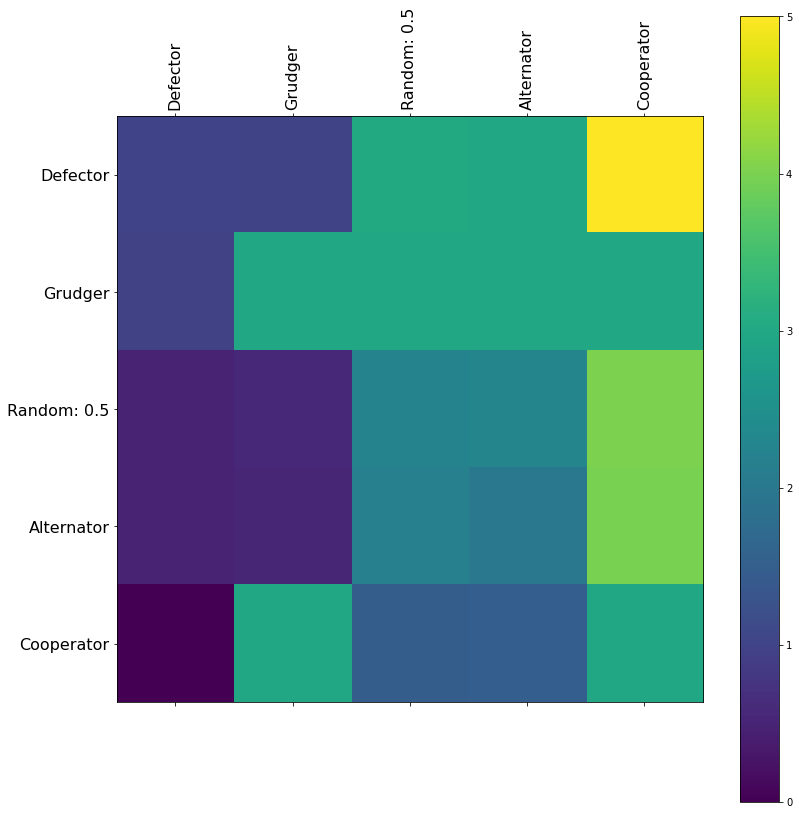

In [6]:
players = [axelrod.Cooperator(), axelrod.Defector(), axelrod.Random(), axelrod.Grudger(), axelrod.Alternator()]
tournament = axelrod.Tournament(players)
results = tournament.play()
print(results.ranked_names)
plot = axelrod.Plot(results)
plot.boxplot().show()
plot.payoff().show()

## Custom strategies

TODO: create a custom strategy to play!

Below I create an example strategy. This strategies does the following:
- The first two choices are C
- For the rest of the match, play C unless the previous two opponent choices were D

In [7]:
C, D = axelrod.Action.C, axelrod.Action.D

class DoctorE(axelrod.Player):
  name = 'Dr E'
  def strategy(self, opponent):

    # return C for the first two rounds
    if len(self.history) < 2:
      return C

    # return D for the last round
    elif len(self.history) == self.match_attributes['length'] - 1:
      return D

    else:
      # if the opponent's last two plays were D, we choose D
      if opponent.history[-1] == D and opponent.history[-2] == D:
        return D
      return C


players = [DoctorE(), axelrod.Random()]
match = axelrod.Match(players, 100)
match.play()
print(match.sparklines())
print_scores(match)

███  ██  ███ ██    ███████████████████  █████████  █████████    ███    ██       █████████████████   
█   █   ██  █     ███████ ██ ███ █ █   ██ ██ ██   ████ ███     ██     █        ███████████ █ ██     
Dr E: 187
Random: 287
Winner:  Random: 0.5


Analysing: 100%|██████████| 25/25 [00:00<00:00, 152.09it/s]


['Defector', 'Grudger', 'Alternator', 'Random: 0.5', 'Dr E', 'Cooperator']


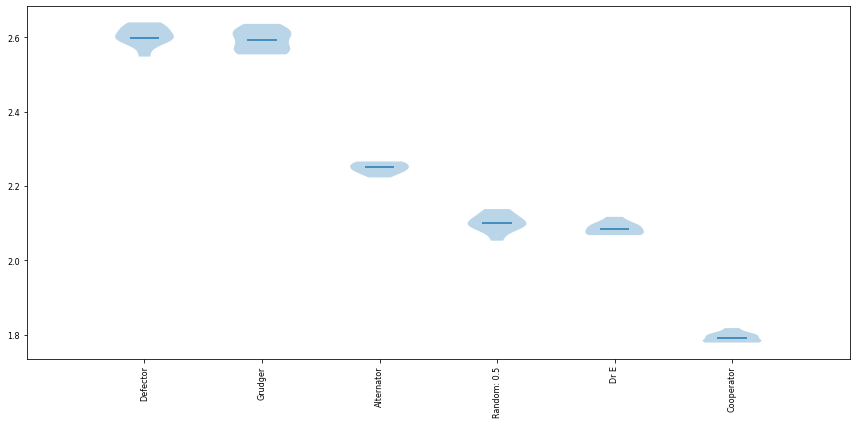

In [8]:
players = [axelrod.Cooperator(), axelrod.Defector(), axelrod.Random(), axelrod.Grudger(), axelrod.Alternator(), DoctorE()]
tournament = axelrod.Tournament(players)
results = tournament.play()
print(results.ranked_names)
plot = axelrod.Plot(results)
plot.boxplot().show()